<a href="https://colab.research.google.com/github/bulentsoykan/IDS6938-Computational-Optimization-Models-and-Methods/blob/main/Graph_Search_Algorithms.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Graph Search Algorithms (Computational Optimization Models and Methods)

## What are Graph Search Algorithms?
Graph search algorithms are a class of algorithms used to navigate and manage data in graph data structures, where data points (nodes) are interconnected by edges.



## What is a Graph?
A graph is a mathematical representation of a set of objects where some pairs of the objects are connected by links. Formally, a graph is denoted as \(G = (V, E)\).

---

## Components of a Graph:
1. **Vertices (Nodes) \((V)\):**
   - The objects that are interconnected through lines.
   - Represented as points.
2. **Edges (Links) \((E)\):**
   - The connections between vertices
   - Represented as lines connecting pairs of vertices.

---

## Types of Graphs:
- **Undirected Graphs:**
  - Edges have no direction.
- **Directed Graphs:**
  - Edges have a direction indicated by arrows.
- **Weighted Graphs:**
  - Edges have weights representing costs or distances.
- **Multi-Graphs:**
  - Multiple edges can exist between the same pair of vertices.
- **Acyclic Graphs:**
  - A graph without any cycles, ensuring there is no path from a node back to itself besides possibly reversing the path.
- **Hypergraphs:**
  - Generalization of a graph where edges can connect any number of vertices, not just pairs.

---

## Why Study Graph Theory?
- **Fundamental Tool:** Essential for solving problems in optimization.
- **Wide Applicability:** From routing algorithms to social network analysis.

---


In [20]:
# Import the necessary library for network analysis and visualization
import networkx as nx
import matplotlib.pyplot as plt

An undirected graph is one where a set of nodes are connected using
bidirectional edges.

In [21]:
# Create a new Graph object. This will be an empty graph at this point.
graph = nx.Graph()

In [22]:
# Create a list of nodes. The nodes are represented as integers from 0 to 4.
nodes = list(range(5))
# Add the list of nodes to the graph. The graph now contains 5 nodes, numbered 0 through 4.
graph.add_nodes_from(nodes)

In [23]:
# Define the edges of the graph. Each tuple represents a direct connection between two nodes.
edges = [(0,1),(1,2), (1,3), (2,3),(3,4)]
# Add the defined edges to the graph. These connections form the structural links between the nodes.
graph.add_edges_from(edges)

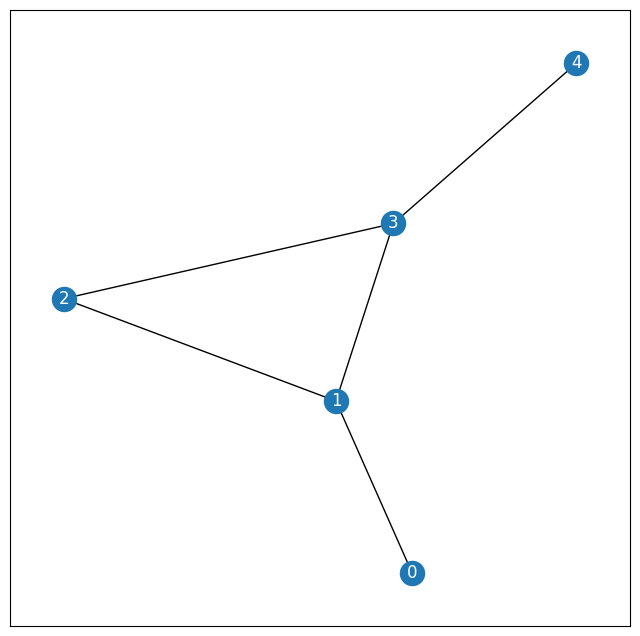

In [24]:
# Draw the network graph using networkx's drawing function.
# 'font_color="white"' sets the color of the node labels
nx.draw_networkx(graph, font_color="white")

---

A directed graph is a graph in which a set of nodes are connected using directional edges.

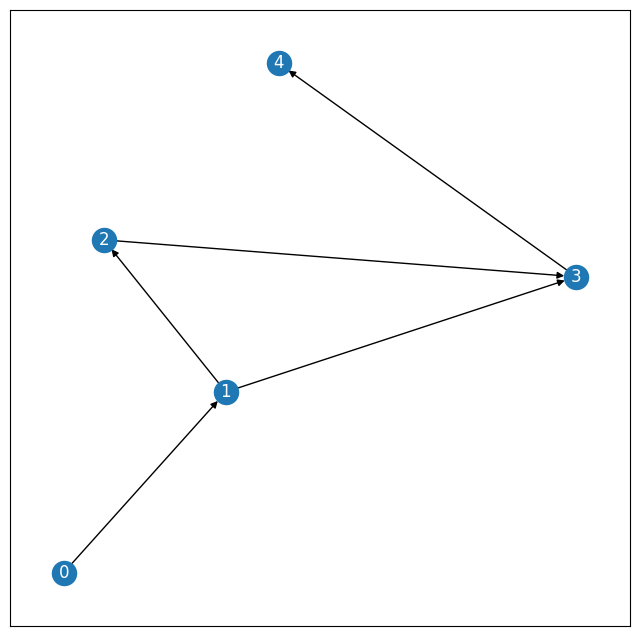

In [25]:
di_graph = nx.DiGraph()
di_graph.add_edges_from(edges)
di_graph.add_nodes_from(nodes)
nx.draw_networkx(di_graph, font_color="white")

---

A multi-graph is a graph in which multiple edges may connect the same pair
of vertices. These edges are called parallel edges.

{0: Text(0.8404511438533157, 0.6494252644982464, '0'),
 1: Text(0.21598285650266125, 0.28609335659527685, '1'),
 2: Text(-0.49315910545294867, 0.3583010309839965, '2'),
 3: Text(-0.20534855100839156, -0.2938196520775199, '3'),
 4: Text(-0.35792634389463673, -1.0, '4')}

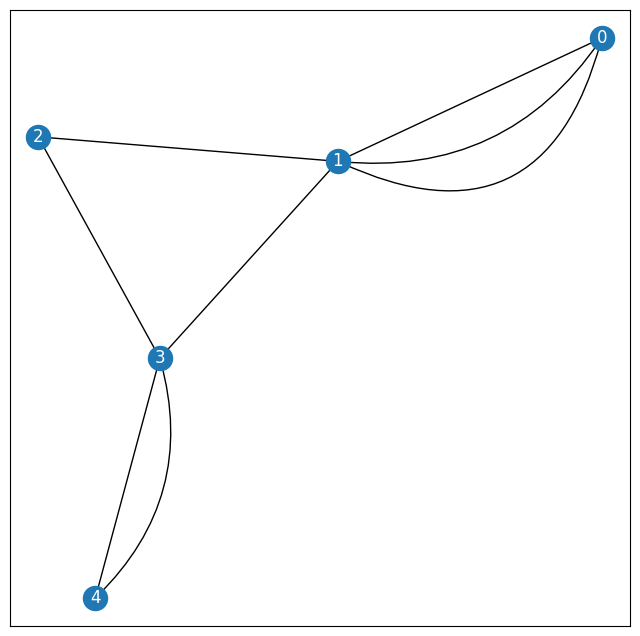

In [26]:
graph = nx.MultiGraph()
nodes = list(range(5))
edges = [(0,1),(0,1),(4,3),(1,2), (1,3), (2,3),(3,4),(0,1)]
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

# Manually define axis and positions for all elements
pos = nx.kamada_kawai_layout(graph)  # position nodes on the space so that the geometric (Euclidean) distance between them is as close as possible to the graph-theoretic (path) distance between them.
ax = plt.gca()

# Draw each edges one at a time, modifying curvature by index
for e in graph.edges:
    ax.annotate("",xy=pos[e[0]], xycoords='data', xytext=pos[e[1]], textcoords='data', arrowprops=dict(arrowstyle="-", connectionstyle=f"arc3, rad={0.3*e[2]}"),zorder=1)

# Draw nodes and node labels
nx.draw_networkx_nodes(graph, pos)
nx.draw_networkx_labels(graph,pos, font_color='w')

# plt.savefig('multigraph.png', format='png', dpi=300)

---

An acyclic graph is a graph without cycles. A cycle in a graph is a path that starts and ends at the same node and traverses through at least one other node. There is no path that cycles back to any starting node.

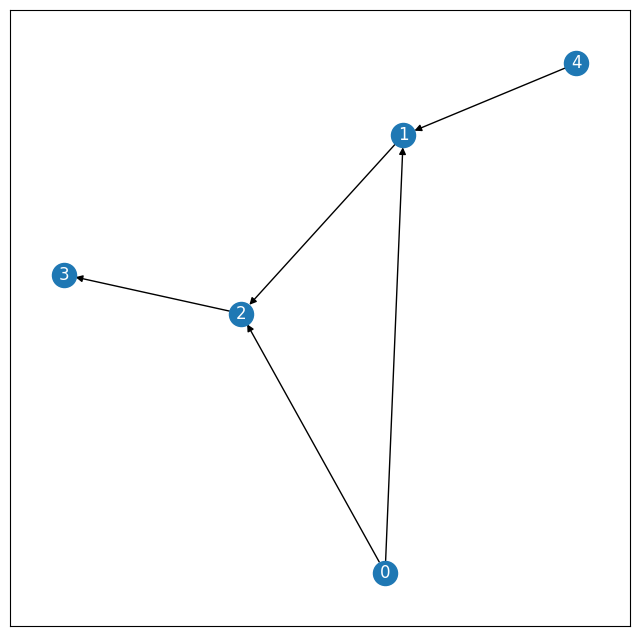

In [27]:
graph = nx.DiGraph()
nodes = list(range(5))
edges = [(0,1), (0,2),(4,1),(1,2),(2,3)]
graph.add_nodes_from(nodes)
graph.add_edges_from(edges)

nx.draw_networkx(graph, nx.kamada_kawai_layout(graph), with_labels=True, font_color='w')
plt.show()

In [28]:
# Check that the graph is acyclic
nx.is_directed_acyclic_graph(graph)

True

---

A hypergraph is a generalization of a graph in which the generalized edges (called hyperedges) can join any number of nodes. Hypergraphs are used to represent complex networks to capture higher-order many-to-many relationships.

For example, a group of people working on a project can be represented by a hypergraph. Each person is represented by a node and the project is represented by a hyperedge. The hyperedge connects all the people working
on the project, regardless of how many people are working on it. The hyperedge can also contain other attributes such as the project's name, the start and end date, the budget, etc.

/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/hypergraph.py:563: FutureWarning: This method or function will be deprecated in a future release. Public references to this method or function will be removed from the Hypergraph API in a future release.
  self._nodes = self.E.restrict_to_levels([1])
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entityset.py:150: DeprecationWarning: misc_props_col and misc_cell_props_col will be deprecated; all public references to these arguments will be removed in a future release.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/hypernetx/classes/entityset.py:1494: RuntimeWarning: The values in the array are unorderable. Pass `sort=False` to suppress this warning.
  properties 

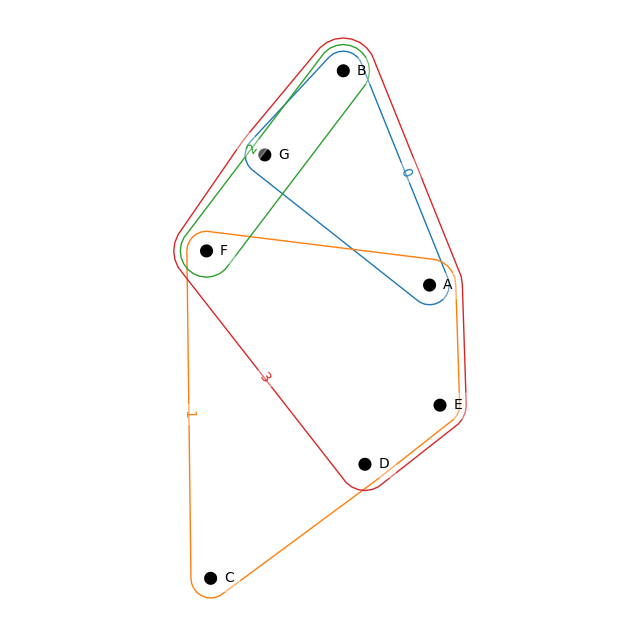

In [29]:
%pip install hypernetx -q
# Import the 'hypernetx' library for creating and manipulating hypergraphs.
import hypernetx as hnx

# Define a dictionary 'data' to represent the hypergraph. Each key is a hyperedge ID, and
# each corresponding value is a tuple of nodes (vertices) that are part of that hyperedge.
data = {
    0: ("A","B","G"), # Hyperedge 0 contains vertices A, B, and G.
    1: ("A","C","D","E","F"),
    2: ("B","F"),
    3: ("A","B","D","E","F","G")
}

# Create a Hypergraph object from the defined data. Each key becomes a hyperedge in the hypergraph,
# and its corresponding set of vertices (tuple values) are connected by that hyperedge.
H = hnx.Hypergraph(data)

# Visualize the hypergraph using 'hypernetx's built-in draw function. This depiction shows
# how the hyperedges connect groups of vertices.
hnx.draw(H)

---

In a weighted graph, a weight is assigned to each edge.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


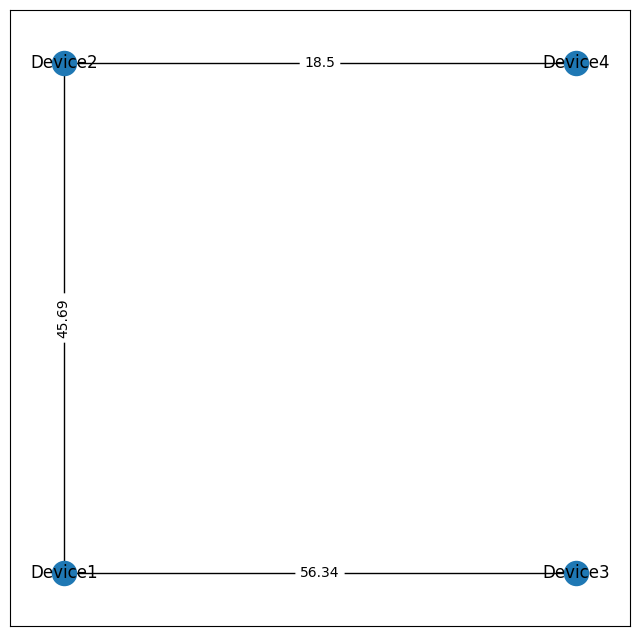

In [30]:
# Create an empty weighted graph
G = nx.Graph()

# Add nodes to the graph (representing devices)
G.add_node("Device1", pos=(0,0))
G.add_node("Device2", pos=(0,2))
G.add_node("Device3", pos=(2,0))
G.add_node("Device4", pos=(2,2))

# Add edges to the graph (representing connections)
G.add_weighted_edges_from([("Device1", "Device2", 45.69),
                           ("Device1", "Device3", 56.34),
                           ("Device2", "Device4", 18.5)])

# Draw the graph
pos = nx.get_node_attributes(G, 'pos')
nx.draw_networkx(G, pos, with_labels=True)
nx.draw_networkx_edge_labels(G, pos, edge_labels={(u, v): d['weight'] for u, v, d in G.edges(data=True)})
plt.show()

Graphs are everywhere. To give a simple example of a social network, let's start by creating a mock social network. In this example, nodes represent individuals and edges represent friendships between them. We will be adding certain properties to nodes (e.g., age) and edges (e.g., type of friendship), visualizing the network.

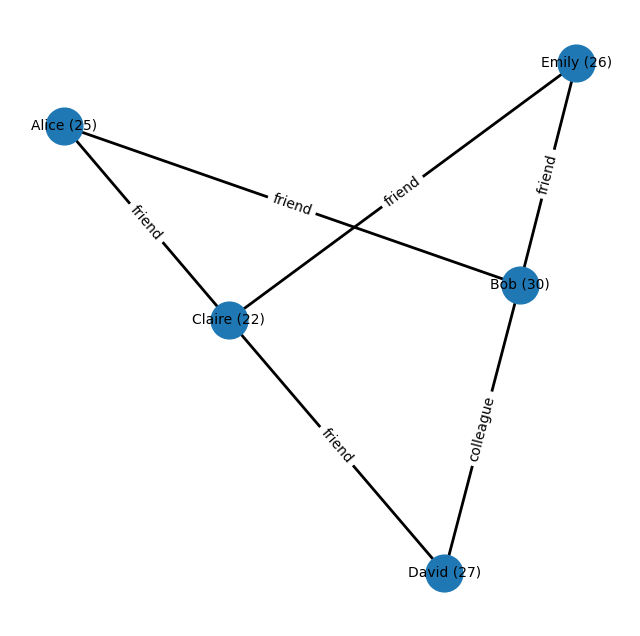

In [31]:
# Create an empty graph
G = nx.Graph()

# Add nodes with the "age" attribute
G.add_node("Alice", age=25)
G.add_node("Bob", age=30)
G.add_node("Claire", age=22)
G.add_node("David", age=27)
G.add_node("Emily", age=26)

# Add edges with the "type" attribute
G.add_edge("Alice", "Bob", type="friend")
G.add_edge("Alice", "Claire", type="friend")
G.add_edge("Bob", "David", type="colleague")
G.add_edge("Claire", "David", type="friend")
G.add_edge("Claire", "Emily", type="friend")
G.add_edge("Bob", "Emily", type="friend")

# Draw the network
pos = nx.spring_layout(G)  # positions for all nodes
nx.draw_networkx_nodes(G, pos, node_size=700)
nx.draw_networkx_edges(G, pos, edgelist=G.edges(), width=2)

# Labels for nodes and edges
nx.draw_networkx_labels(G, pos, labels={node: f"{node} ({data['age']})" for node, data in G.nodes(data=True)}, font_size=10)
edge_labels = nx.get_edge_attributes(G,'type')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

plt.axis('off')  # Turn off the axis
plt.show()  # Display the graph

Let's consider a transportation network where graph nodes symbolize significant points like intersections and points of interest (POIs), and edges represent the streets. In this type of graph, the edges are typically directed, indicating a specified travel direction, and they can contain additional attributes such as length, speed limits, and capacity. Each edge connects two nodes and the direction of the edge reflects the flow of traffic. The concept of a route in this network can be described as a series of edges that link a starting node to an end node. osmnx is a Python tool designed to streamline the process of fetching and handling data from OpenStreetMap (OSM), which is a community-maintained global geographic database. This library enables users to extract specified data from OSM and formats it into a networkx graph structure for further manipulation and analysis. It also allows for the transformation of a text-based description of a location into a NetworkX graph. As an example, let's consider using the University of Central Florida .

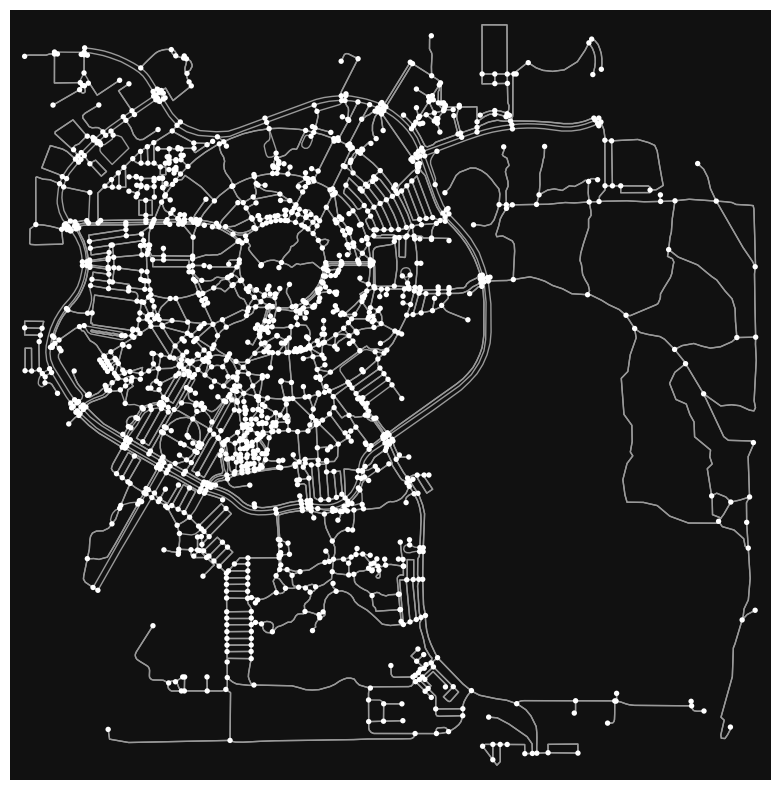

(<Figure size 1000x1000 with 1 Axes>, <Axes: >)

In [32]:
%pip install -q osmnx

# Import the osmnx library, which is used for downloading and analyzing street networks from OpenStreetMap
import osmnx

# Define a variable 'place_name' with the value "University of Central Florida", which specifies the location we are interested in
place_name = "University of Central Florida"

# Retrieve the street network graph from OpenStreetMap based on the specified address.
graph = osmnx.graph_from_address(place_name)

# Plot the retrieved street network graph using osmnx's plot_graph function.
# Set the figure size to 10x10 inches
osmnx.plot_graph(graph,figsize=(10,10))

The graphic displays the nodes and links forming the roadway system around the main UCF campus. Although it is visually appealing, it falls short in offering any geographical context such as nearby landmarks. Therefore, we should consider utilizing a folium map as a foundational layer to include details such as street names, neighborhood identifiers, and outlines of buildings.

In [33]:
# Retrieve the street network graph from OpenStreetMap for UCF, stored in 'place_name'.
graph = osmnx.graph_from_address(place_name)

# Generate a Folium map object visualizing the street network graph.
# This uses the 'plot_graph_folium' function from the osmnx.folium module,
# which creates an interactive map that can be viewed in web browsers.
osmnx.folium.plot_graph_folium(graph)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-33-92c4fbec0f11>:7: FutureWarning: The `folium` module has been deprecated and will be removed in the v2.0.0 release. You can generate and explore interactive web maps of graph nodes, edges, and/or routes automatically using GeoPandas.GeoDataFrame.explore instead, for example like: `ox.graph_to_gdfs(G, nodes=False).explore()`. See the OSMnx examples gallery for complete details and demonstrations.
  osmnx.folium.plot_graph_folium(graph)


Imagine that you need to travel between two points. For instance, you want to go to the library after the class. We will explore methods to find the shortest route between these two locations. First, let's mark these two spots on a map using folium.

In [34]:
# Import the folium library, which allows for the creation and manipulation of interactive maps.
import folium
ucf=(28.603084883096653, -81.20010647460916)

source_point = (28.585131137853875, -81.19933067732575)
destination_point = (28.600524955804016, -81.20151984030602)

# Create a map centered around UCF with an initial zoom level of 14 for a close-up view.
m = folium.Map(location=ucf, zoom_start=14)

# Add a marker to the map at the source point location.
folium.Marker(location=source_point,icon=folium.Icon(color='red', icon='fa-solid fa-school', prefix='fa')).add_to(m)
folium.Marker(location=ucf,icon=folium.Icon(color='blue',icon='graduation-cap', prefix='fa')).add_to(m)
folium.Marker(location=destination_point,icon=folium.Icon(color='green',icon='university', prefix='fa')).add_to(m)
m

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [35]:
# Specify the mode of transport and create a graph from a point
mode_of_transport = 'drive'
G = osmnx.graph_from_point(source_point, dist=3000, network_type=mode_of_transport)

# Find the nearest nodes to the source and destination points using osmnx
source_node = osmnx.nearest_nodes(G, source_point[1], source_point[0])
destination_node = osmnx.nearest_nodes(G, destination_point[1], destination_point[0])

# Use Dijkstra's algorithm to find the shortest path, considering the weight as the length of the path
shortest_path = nx.dijkstra_path(G, source_node, destination_node, weight='length')

# Get the array of coordinates that compose the shortest path
route_lng_lats = [(G.nodes[node]['y'], G.nodes[node]['x']) for node in shortest_path]

# Create a folium map centered on the average location between the source and destination
map_center = [(source_point[0] + destination_point[0]) / 2, (source_point[1] + destination_point[1]) / 2]
m = folium.Map(location=map_center, zoom_start=14)

# Add markers for the source and destination points
folium.Marker(source_point, icon=folium.Icon(color='red', icon='star')).add_to(m)
folium.Marker(destination_point, icon=folium.Icon(color='green', icon='flag')).add_to(m)

# Plot the shortest path on the map with a polyline
folium.PolyLine(route_lng_lats, color='blue', weight=5, opacity=0.8).add_to(m)

# Display the created map
m

### `spring_layout()`

For visual presentation purposes, we use `spring_layout()` to determine the positions of nodes and edges in the graph. The spring layout employs a random number generator internally to generate these positions. We can pass a seed value to this function, which ensures deterministic generation of the so-called "random" positions, guaranteeing the same layout on each execution.

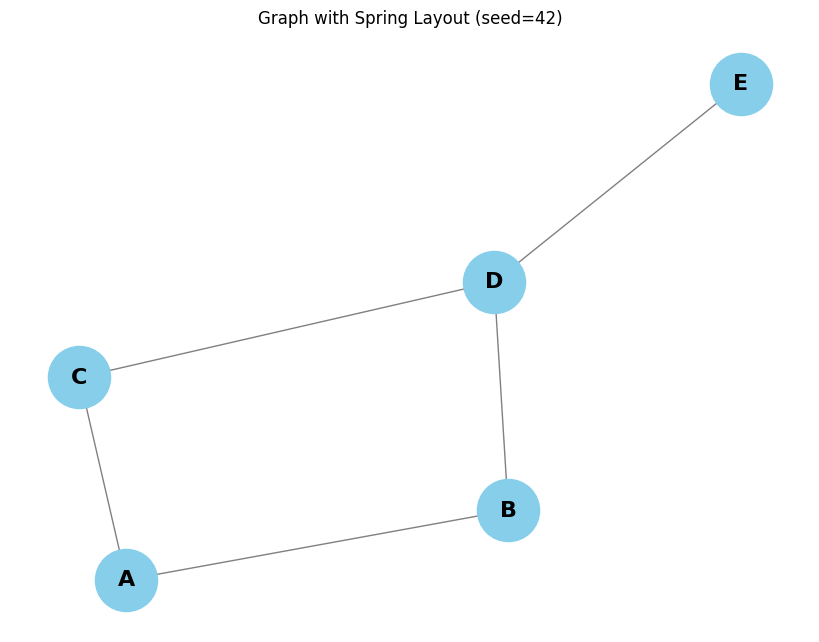

In [45]:

# Create a directed graph
G = nx.DiGraph()
edges = [('A', 'B'), ('A', 'C'), ('B', 'D'), ('C', 'D'), ('D', 'E')]
G.add_edges_from(edges)

# Convert to undirected graph
G_undirected = G.to_undirected()

# Generate positions with a seed for determinism
pos = nx.spring_layout(G_undirected, seed=42)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G_undirected, pos, with_labels=True, node_color='skyblue', node_size=2000, edge_color='gray', font_size=16, font_weight='bold')
plt.title('Graph with Spring Layout (seed=42)')
plt.show()

Kruskal's algorithm can be effortlessly implemented in Python by leveraging NetworkX’s `find_cycle()` and `is_connected()` methods. These methods help determine whether an edge is a suitable candidate for inclusion in the Minimum Spanning Tree (MST) and manage the algorithm's termination condition.

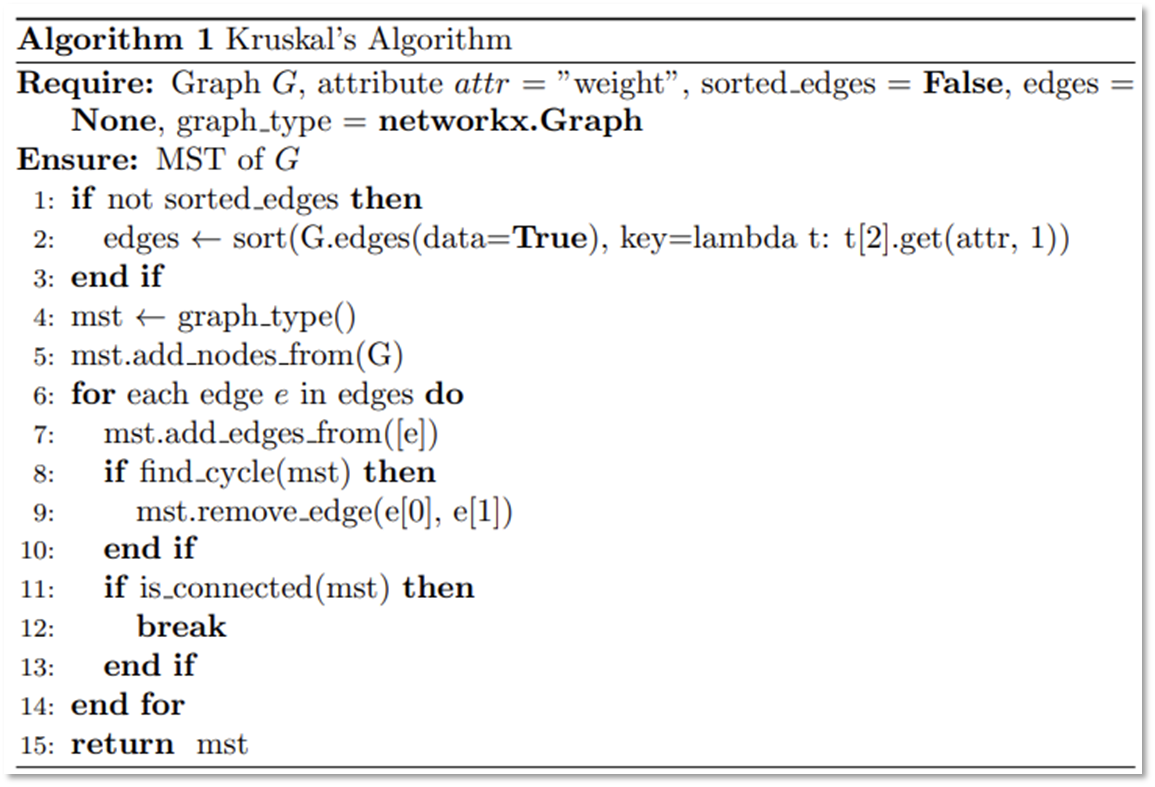

### Kruskal's Algorithm Pseudocode Explanation

#### Input
1. **Graph `G`:** The input graph containing nodes and edges.
2. **Attribute `attr`:** The edge attribute used for weights (default is "weight").
3. **sorted_edges:** A boolean indicating whether the edges are already sorted (default is `False`).
4. **edges:** A list of edges (optional, default is `None`).
5. **graph_type:** The type of graph (default is `networkx.Graph` for undirected graphs).

#### Initialization
1. **Edge Sorting:**
   - If the edges are not sorted, the algorithm sorts them based on their weights using the given attribute (`attr`). This ensures that we start adding the smallest edges first, which is essential for Kruskal’s algorithm to work correctly.

2. **MST Setup:**
   - An empty graph `mst` is initialized to store the Minimum Spanning Tree (MST).
   - All nodes from the original graph `G` are added to `mst`.

#### Processing Edges
1. **Iterate over Edges:**
   - For each edge in the sorted list of edges:
     - Add the edge to `mst`.

2. **Cycle Detection:**
   - Use the `find_cycle()` method from NetworkX to detect if the newly added edge forms a cycle in `mst`.
   - If a cycle is detected (`find_cycle(mst)` returns `True`), remove the edge from `mst` to maintain the tree property (i.e., no cycles).

3. **Connectivity Check:**
   - Use the `is_connected()` method from NetworkX to check if `mst` is fully connected.
   - If `mst` is connected, it means we have successfully constructed the MST. The loop breaks early, terminating the algorithm.

#### Return
- The constructed Minimum Spanning Tree `mst` is returned as the output.

---

### Key Points

1. **Edge Sorting:**
   - Sorting edges by weight ensures we consider the smallest edges first, which is crucial for the greedy approach of Kruskal's algorithm.

2. **Cycle Detection:**
   - The `find_cycle(mst)` method helps maintain the tree property of the MST by ensuring that no cycles are formed when edges are added.

3. **Graph Connectivity:**
   - The `is_connected(mst)` method checks if all nodes in `mst` are connected. Once the MST is fully connected, the algorithm can safely terminate.

4. **Efficiency:**
   - The algorithm can terminate early if `mst` becomes fully connected before all edges are processed, enhancing the efficiency of the algorithm.

---

- Kruskal's algorithm is a greedy algorithm that builds the Minimum Spanning Tree by continuously adding the smallest edge that does not form a cycle. By leveraging NetworkX’s `find_cycle()` and `is_connected()` methods, the implementation in Python is simplified. This approach ensures that the resulting tree spans all nodes while minimizing the total edge weight.

---

In [36]:
def Kruskal(G, attr="weight", sorted_edges=False, edges=None, graph_type=nx.Graph):
    # Sort edges based on weight attribute if not already sorted
    if not sorted_edges:
        edges = sorted(G.edges(data=True), key=lambda t: t[2].get(attr, 1))

    # Create an empty graph to store the Minimum Spanning Tree (MST)
    mst = graph_type()
    mst.add_nodes_from(G) # Add all the nodes from the original graph to the MST

    # Iterate through the edges in sorted order
    for e in edges:
        mst.add_edges_from([e]) # Add the edge to the MST
        try:
            nx.find_cycle(mst) # Check for cycles in the MST
            mst.remove_edge(e[0], e[1])  # Remove the edge if it forms a cycle
        except:
            try:
                if nx.is_connected(mst): # Check if the MST is connected (termination condition)
                    break
            except:
                if nx.is_strongly_connected(mst): # Possibly handle directed graphs
                    break
            continue
    return mst


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Let's utilize this algorithm and code to determine the Minimum Spanning Tree (MST) for all nodes within the vicinity of the University of Central Florida. Assume that we are now tasked with installing new communication cables across UCF's campus and aim to minimize the total length of cable required.



/usr/local/lib/python3.10/dist-packages/osmnx/graph.py:106: FutureWarning: The clean_periphery argument has been deprecated and will be removed in the v2.0.0 release. Future behavior will be as though clean_periphery=True. See the OSMnx v2 migration guide: https://github.com/gboeing/osmnx/issues/1123
  G = graph_from_polygon(


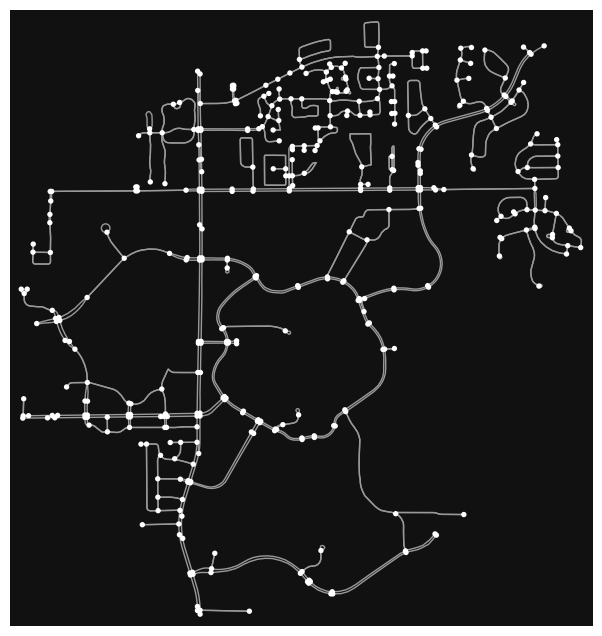

In [37]:
# Define the geographic coordinates for UCF
ucf=(28.603084883096653, -81.20010647460916)

# Create a graph from a specific point using OpenStreetMap data within a 2000-meter radius
# Only include drivable streets, simplify complex intersections
G = osmnx.graph_from_point(
    ucf, dist=2000, clean_periphery=True, simplify=True, network_type="drive"
)

# Plot the original graph
fig, ax = osmnx.plot_graph(G)

At first glance, the road network graph appears as one large, connected component; however, this isn't the case. Certain one-way streets seem to connect adjacent nodes in the graph, but in practice, they do not offer bidirectional travel (you can go from A to B, but not the other way around). We resolve this issue by converting the directed graph into an undirected graph using the `to_undirected` function in NetworkX.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


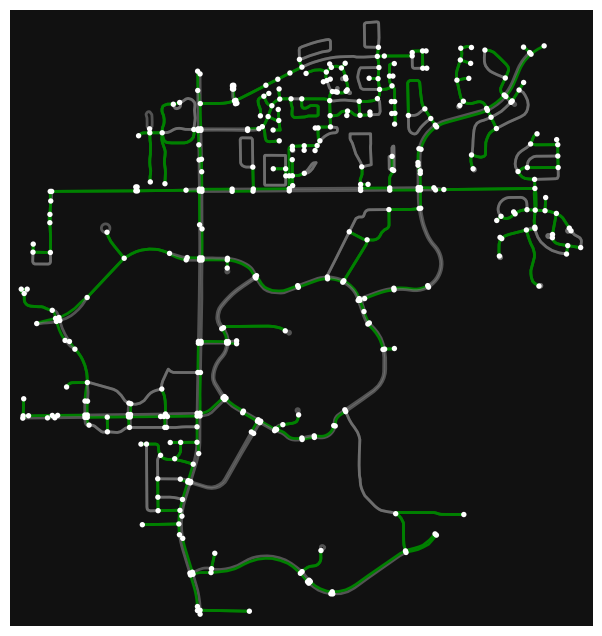

In [38]:
# Convert the graph to an undirected graph (necessary for Kruskal's algorithm)
undir_G = G.to_undirected()

# Sort the edges of the undirected graph by their length in ascending order
sorted_edges = sorted(undir_G.edges(data=True), key=lambda t: t[2].get("length", 1))

# Run the Kruskal's algorithm on the graph to find the minimum spanning tree (MST)
mst = Kruskal(undir_G, sorted_edges=True, edges=sorted_edges, graph_type=nx.MultiGraph)

# Highlight the edges in the graph that are part of the MST
highlight_edges = ["g" if e in mst.edges else "grey" for e in G.edges]
edge_alphas = [1 if e in mst.edges else 0.6 for e in G.edges]

# Plot the original graph with the MST highlighted in green
osmnx.plot_graph(
    G, edge_linewidth=2, edge_color=highlight_edges, edge_alpha=edge_alphas
)

# Display the plot
plt.show()